In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('sales_data.csv')
df.head(10)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0
5,2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0
6,2018-04-18,Central,Martha,Steven,Television,75.0,1198.0,89850.0
7,2018-05-05,Central,Hermann,Luis,Television,90.0,1198.0,107820.0
8,2018-05-22,West,Douglas,Michael,Television,32.0,1198.0,38336.0
9,2018-06-08,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0


### 1. Total Sales by Product (Item)

- **`total_sales_by_item = df.groupby('Item')['Sale_amt'].sum().reset_index()`**: This line groups the DataFrame `df` by the 'Item' column and sums the 'Sale_amt' for each item. The result is then reset to a regular DataFrame format.

- **`total_sales_by_item = total_sales_by_item.sort_values(by='Sale_amt', ascending=False)`**: This sorts the resulting DataFrame by 'Sale_amt' in descending order to better visualize which items have the highest sales.

- **`plt.figure(figsize=(10, 6))`**: Initializes a figure for the plot with a size of 10 inches in width and 6 inches in height.

- **`sns.barplot(x='Sale_amt', y='Item', data=total_sales_by_item, palette='viridis')`**: 
   - This creates a bar plot using Seaborn, where the x-axis represents the total sales amount (`Sale_amt`), and the y-axis represents the items (`Item`).
   - The `palette='viridis'` applies the 'viridis' color palette to the bars.

- **`plt.title('Total Sales by Product (Item)')`**: Sets the title of the chart to 'Total Sales by Product (Item)'.

- **`plt.xlabel('Total Sales Amount')`**: Sets the x-axis label to 'Total Sales Amount'.

- **`plt.ylabel('Item')`**: Sets the y-axis label to 'Item'.

- **`plt.show()`**: Displays the plot.


In [74]:
total_sales_by_item = df.groupby('Item')['Sale_amt'].sum().reset_index()

total_sales_by_item = total_sales_by_item.sort_values(by='Sale_amt', ascending=False)

total_sales_by_item

,Item,Sale_amt
3,Television,857768.0
2,Home Theater,361000.0
0,Cell Phone,62550.0
4,Video Games,23107.5
1,Desk,1250.0


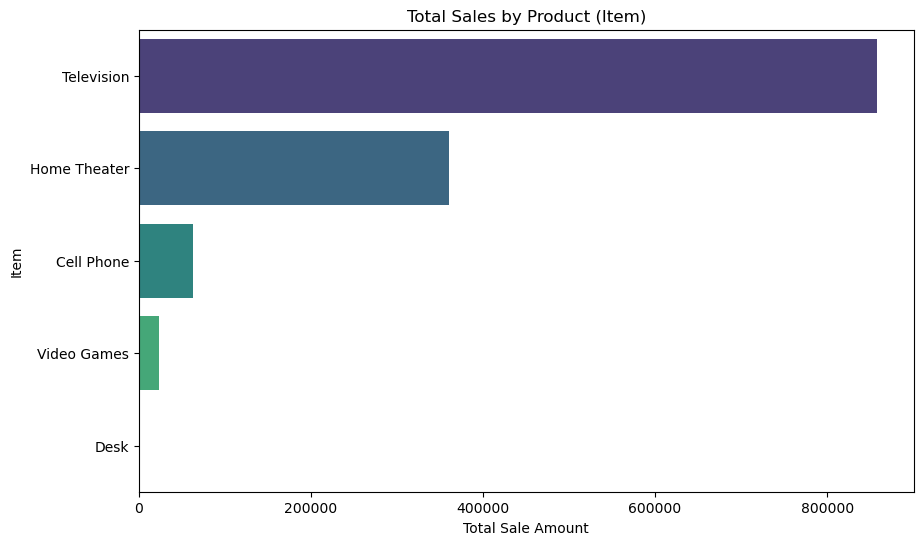

In [75]:
plt.figure(figsize=(10,6))

sns.barplot(x='Sale_amt', y='Item', data=total_sales_by_item, palette='viridis', hue='Item')
plt.title('Total Sales by Product (Item)')
plt.xlabel('Total Sale Amount')
plt.ylabel('Item')

plt.show()

### 2. Top-Selling Products
**Identify the top 5 selling products:**

In [76]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [77]:
top_3_items = total_sales_by_item.head(3)

top_3_items

,Item,Sale_amt
3,Television,857768.0
2,Home Theater,361000.0
0,Cell Phone,62550.0


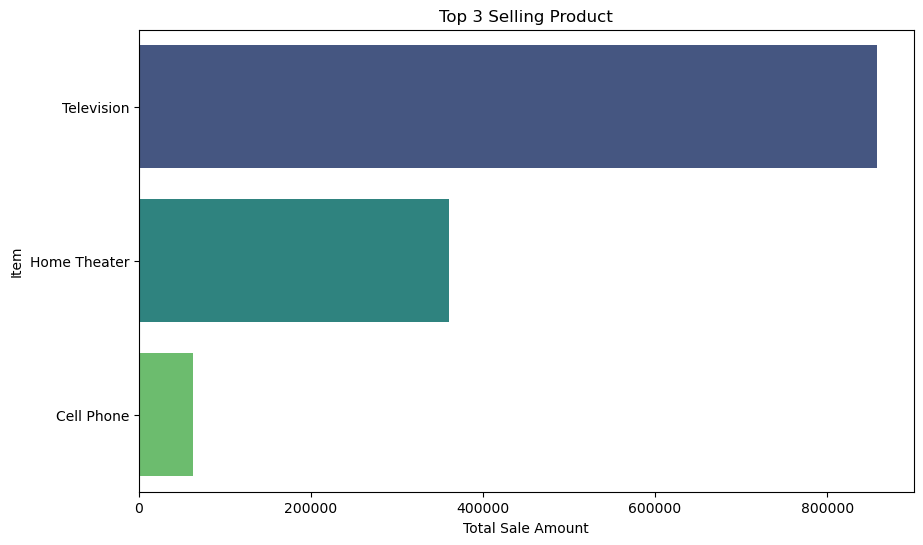

In [78]:
plt.figure(figsize=(10,6))

sns.barplot(x='Sale_amt', y='Item', data=top_3_items, palette='viridis', hue='Item')
plt.title('Top 3 Selling Product')
plt.xlabel('Total Sale Amount')
plt.ylabel('Item')

plt.show()

### 3. Monthly Sales Trend of Top Products

- **`df['OrderDate'] = pd.to_datetime(df['OrderDate'])`**: Converts the 'OrderDate' column into a datetime format to enable date-specific operations.

- **`df['MonthYear'] = df['OrderDate'].dt.to_period('M')`**: Extracts the month and year from 'OrderDate' and creates a new column, 'MonthYear', which shows only the month and year.

- **`df['Sale_amt'] = pd.to_numeric(df['Sale_amt'], errors='coerce')`**: Converts the 'Sale_amt' column to numeric format, converting any non-numeric values to `NaN` to handle errors gracefully.

- **`df = df.dropna(subset=['Sale_amt'])`**: Removes rows where 'Sale_amt' contains `NaN` values to clean the data. (Alternatively, you could fill NaNs with zeros if needed.)

- **`top_3_items_value = top_3_items['Item'].values`**: Identifies the top 3 selling items by their 'Item' names. The `.values` attribute is used to extract them as an array.

- **`df_top_3 = df[df['Item'].isin(top_3_items_value)]`**: Filters the data to include only sales records for the top 3 items.

- **`monthly_sales_trend = df_top_3.groupby(['MonthYear', 'Item'])['Sale_amt'].sum().reset_index()`**: Groups the filtered data by 'MonthYear' and 'Item' and sums the 'Sale_amt' for each group.

- **`monthly_sales_trend['MonthYear'] = monthly_sales_trend['MonthYear'].astype(str)`**: Converts 'MonthYear' to a string to facilitate easy plotting on the x-axis.

- **Visualization**:
  - **`plt.figure(figsize=(12, 6))`**: Creates a figure for the plot with dimensions 12 inches by 6 inches.
  - **`sns.lineplot(x='MonthYear', y='Sale_amt', hue='Item', data=monthly_sales_trend, marker='o', palette='viridis')`**: Plots a line chart where:
    - The x-axis represents the 'MonthYear' values.
    - The y-axis represents the total sales amount ('Sale_amt').
    - The 'hue' differentiates the lines by the top 3 items.
    - A marker (`'o'`) is added for each point, and the 'viridis' palette is used for coloring.
  - **`plt.title('Monthly Sales Trend for Top 3 Selling Products')`**: Sets the title of the plot.
  - **`plt.xlabel('Month-Year')`**: Labels the x-axis as 'Month-Year'.
  - **`plt.ylabel('Total Sales Amount')`**: Labels the y-axis as 'Total Sales Amount'.
  - **`plt.xticks(rotation=45)`**: Rotates the x-axis labels by 45 degrees for better readability.
  - **`plt.show()`**: Displays the plot.


In [79]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [80]:
# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month and year from 'OrderDate'
df['MonthYear'] = df['OrderDate'].dt.to_period('M')

# Convert 'Sale_amt' to numeric, coercing any non-numeric values to NaN
df['Sale_amt'] = pd.to_numeric(df['Sale_amt'], errors='coerce')

# Drop rows where 'Sale_amt' is NaN (optional: you could fill with 0 instead)
df = df.dropna(subset=['Sale_amt'])

# Get the top 3 items
top_3_items_value = top_3_items['Item'].head(3).values

# Filter data for top 3 items
df_top_3 = df[df['Item'].isin(top_3_items_value)]
df_top_3

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,MonthYear
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0,2018-01
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0,2018-01
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0,2018-02
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0,2018-02
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0,2018-03
5,2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0,2018-04
6,2018-04-18,Central,Martha,Steven,Television,75.0,1198.0,89850.0,2018-04
7,2018-05-05,Central,Hermann,Luis,Television,90.0,1198.0,107820.0,2018-05
8,2018-05-22,West,Douglas,Michael,Television,32.0,1198.0,38336.0,2018-05
9,2018-06-08,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0,2018-06


In [81]:
# Group by 'MonthYear' and 'Item', and sum the 'Sale_amt'
monthly_sales_trend = df_top_3.groupby(['MonthYear', 'Item'])['Sale_amt'].sum().reset_index()

# Convert 'MonthYear' to string for plotting
monthly_sales_trend['MonthYear'] = monthly_sales_trend['MonthYear'].astype(str)


monthly_sales_trend


,MonthYear,Item,Sale_amt
0,2018-01,Home Theater,25000.0
1,2018-01,Television,113810.0
2,2018-02,Cell Phone,6075.0
3,2018-02,Television,43128.0
4,2018-03,Television,67088.0
5,2018-04,Home Theater,30000.0
6,2018-04,Television,89850.0
7,2018-05,Television,146156.0
8,2018-06,Home Theater,30000.0
9,2018-06,Television,107820.0


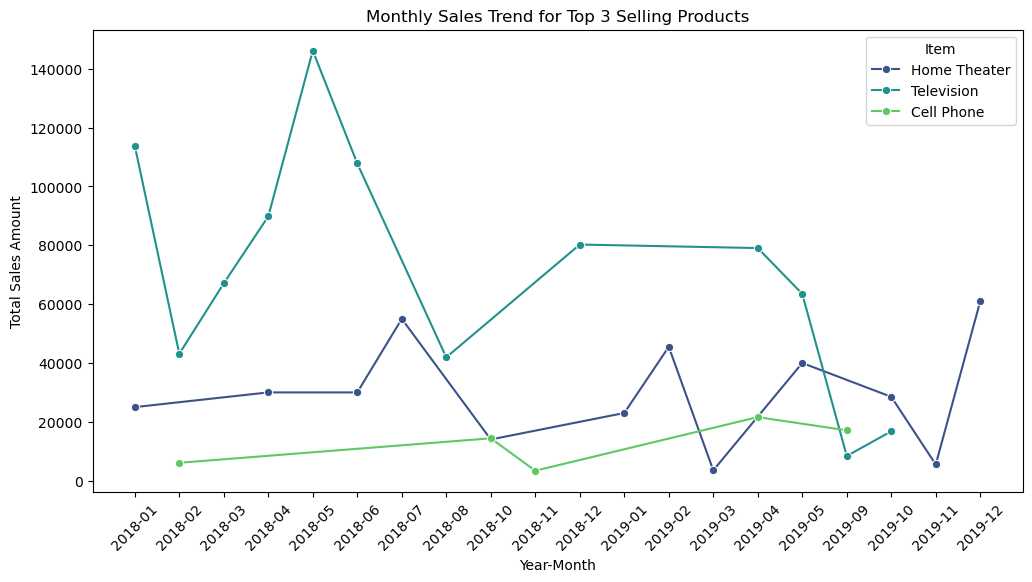

In [82]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='MonthYear', y='Sale_amt', hue='Item', data=monthly_sales_trend, marker='o', palette='viridis')
plt.title('Monthly Sales Trend for Top 3 Selling Products')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

### 4. Average Unit Price by Product

- **Data Preparation**:
  - The dataset is grouped by `Item`, and the average of the `Unit_price` for each item is calculated using the `groupby()` function.
  - The resulting data is reset into a dataframe and sorted in descending order based on the `Unit_price` for better visualization.

- **Visualization**:
  - A bar chart is used to display the average unit price for each product (item).
  - **`sns.barplot(x='Unit_price', y='Item', data=average_price_by_item, palette='viridis')`**: Creates a horizontal bar plot where the x-axis represents the average unit price, and the y-axis shows the different items.
  - The bars are colored using the `viridis` palette for visual appeal.
  - The chart is titled "Average Unit Price by Product," with appropriate labels for the axes.


In [83]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,MonthYear
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0,2018-01
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0,2018-01
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0,2018-02
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0,2018-02
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0,2018-03


In [84]:
# Calculate average 'Unit_price' by 'Item'
average_price_by_item = df.groupby('Item')['Unit_price'].mean().reset_index()

# Sort for better visualization
average_price_by_item = average_price_by_item.sort_values(by='Unit_price', ascending=False)

average_price_by_item

,Item,Unit_price
3,Television,1198.0
2,Home Theater,500.0
0,Cell Phone,225.0
1,Desk,125.0
4,Video Games,58.5


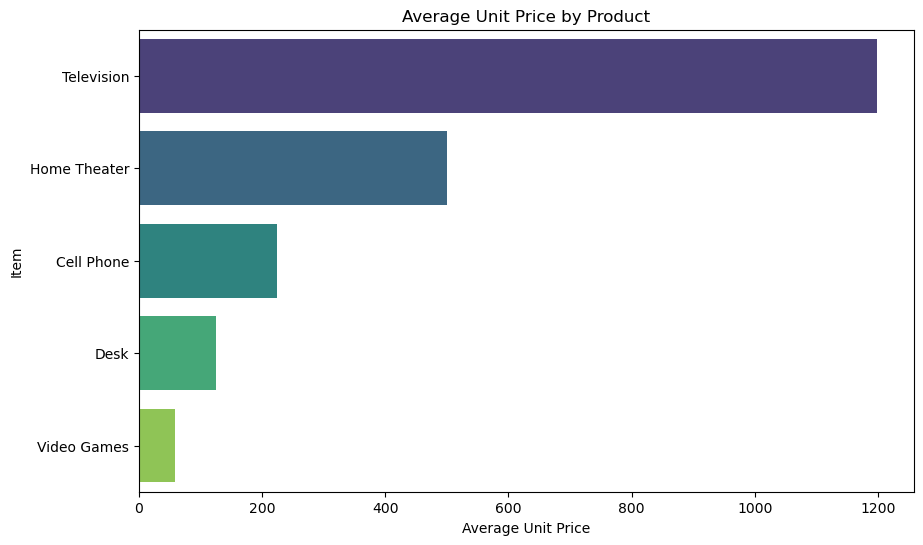

In [85]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Unit_price', y='Item', data=average_price_by_item, palette='viridis', hue='Item')
plt.title('Average Unit Price by Product')
plt.xlabel('Average Unit Price')
plt.ylabel('Item')
plt.show()

### 5. Total Units Sold per Product

- **Data Preparation**:
  - The dataset is grouped by `Item`, and the total `Units` sold for each item is calculated using the `groupby()` function.
  - The resulting data is reset into a dataframe and sorted in descending order based on the total units sold for better visualization.

- **Visualization**:
  - A bar chart is used to display the total units sold for each product.
  - **`sns.barplot(x='Units', y='Item', data=units_sold_by_item, palette='viridis')`**: Creates a horizontal bar plot where the x-axis represents the total units sold, and the y-axis shows the different items.
  - The bars are colored using the `viridis` palette for visual enhancement.
  - The chart is titled "Total Units Sold per Product," with relevant labels for the axes.


In [86]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,MonthYear
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0,2018-01
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0,2018-01
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0,2018-02
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0,2018-02
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0,2018-03


In [87]:
units_sold_by_item = df.groupby('Item')['Units'].sum().reset_index()

units_sold_by_item = units_sold_by_item.sort_values(by='Units', ascending=False)

units_sold_by_item

,Item,Units
2,Home Theater,722.0
3,Television,716.0
4,Video Games,395.0
0,Cell Phone,278.0
1,Desk,10.0


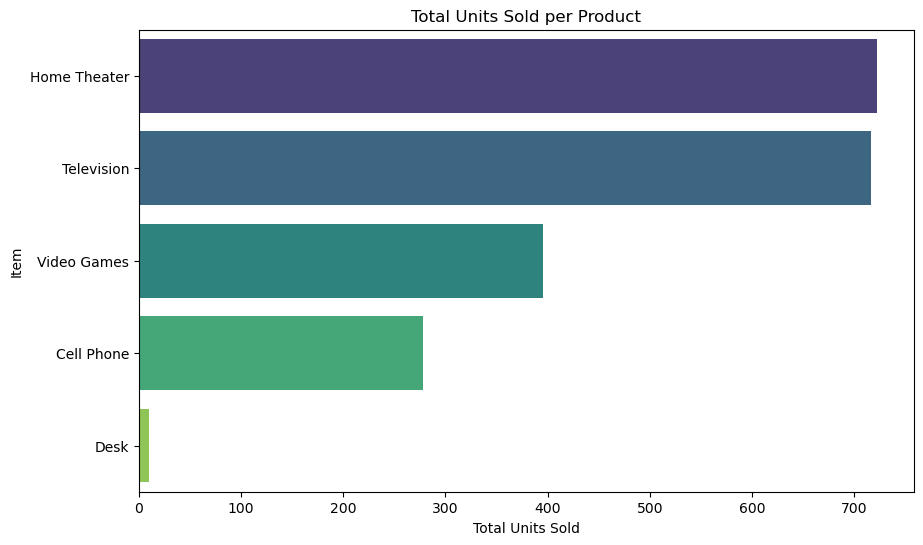

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Units', y='Item', data=units_sold_by_item, palette='viridis', hue='Item')
plt.title('Total Units Sold per Product')
plt.xlabel('Total Units Sold')
plt.ylabel('Item')
plt.show()